In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [78]:
df = pd.read_csv('smartphone-cleaned.csv')

In [79]:
df.shape

(980, 25)

In [80]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [82]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [83]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [84]:
import numpy as np
outliers = []
for feature in df.select_dtypes(include=np.number).columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    if df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].any(axis=None):
        outliers.append(feature)
print("Attributes with outliers:", outliers)

Attributes with outliers: ['price', 'num_cores', 'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_front_cameras', 'primary_camera_rear', 'primary_camera_front', 'extended_upto']


In [85]:
df['rating'] = df['rating'].fillna(df['rating'].mean())



In [86]:
median_value = df['fast_charging'].median()
df['fast_charging'] = df['fast_charging'].fillna(median_value)

In [87]:
df = df.dropna(subset=['os'], inplace=False)


In [88]:
df['extended_upto'] = df['extended_upto'].ffill()




In [89]:
df['battery_capacity'] = df['battery_capacity'].bfill()


In [90]:
# Calculate the mode of the 'processor_brand' column
mode_value = df['processor_brand'].mode()[0]

# Replace null values with the mode
df['processor_brand'] = df['processor_brand'].fillna(mode_value)


In [91]:
mode_value = df['processor_speed'].mode()[0]

# Replace null values with the mode
df['processor_speed'] = df['processor_speed'].fillna(mode_value)

In [92]:
df.isna().sum()

brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    6
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
resolution                   0
num_rear_cameras             0
num_front_cameras            3
os                           0
primary_camera_rear          0
primary_camera_front         3
extended_memory_available    0
extended_upto                1
dtype: int64

<Axes: xlabel='brand_name'>

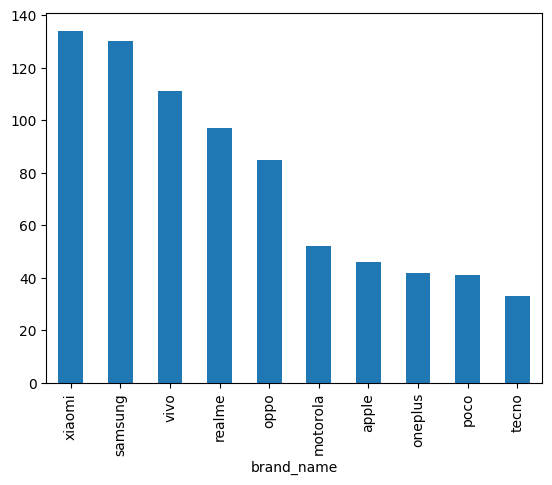

In [93]:
# plot a graph of top 5 brands
df['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

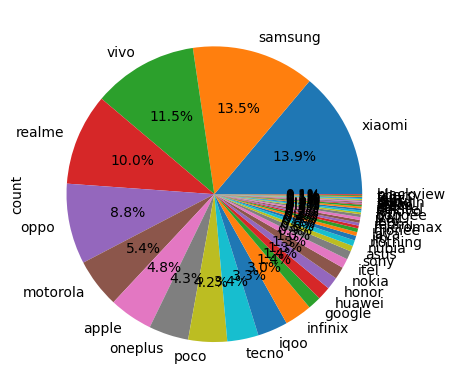

In [94]:
# pie chart
df['brand_name'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [95]:
df['brand_name'].isnull().sum()

np.int64(0)

In [96]:
# model
df['model'].nunique()

966

In [97]:
# price
df['price'].describe()
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
count,966.000000,966.000000,960.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.00000,963.000000,966.000000,963.000000,966.000000,965.000000
mean,31657.525880,78.177838,7.772917,2.403644,4821.436853,0.855072,43.293996,6.528986,139.751553,6.532060,92.180124,2.81677,1.029076,50.378778,16.539668,0.639752,736.165803
std,38783.684474,7.008126,0.833661,0.459556,991.258510,0.352210,30.994542,2.728223,105.623539,0.331988,28.895607,0.77698,0.168106,33.146837,10.857360,0.480321,361.825853
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.00000,1.000000,2.000000,0.300000,0.000000,32.000000
25%,12999.000000,75.000000,8.000000,2.000000,4500.000000,1.000000,25.000000,4.000000,64.000000,6.500000,60.000000,2.00000,1.000000,24.000000,8.000000,0.000000,512.000000
50%,19990.000000,79.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.570000,90.000000,3.00000,1.000000,50.000000,16.000000,1.000000,1024.000000
75%,34999.000000,84.000000,8.000000,2.840000,5000.000000,1.000000,65.000000,8.000000,128.000000,6.670000,120.000000,3.00000,1.000000,64.000000,16.000000,1.000000,1024.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.00000,2.000000,200.000000,60.000000,1.000000,2048.000000


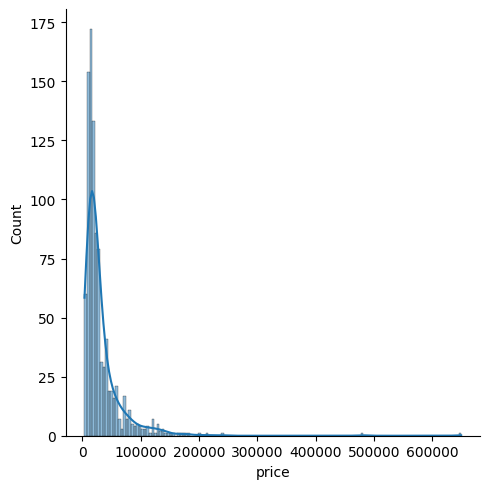

In [98]:
sns.displot(kind='hist',data=df,x='price',kde=True)

In [99]:
df['price'].skew()

np.float64(7.004427889924124)

<Axes: ylabel='price'>

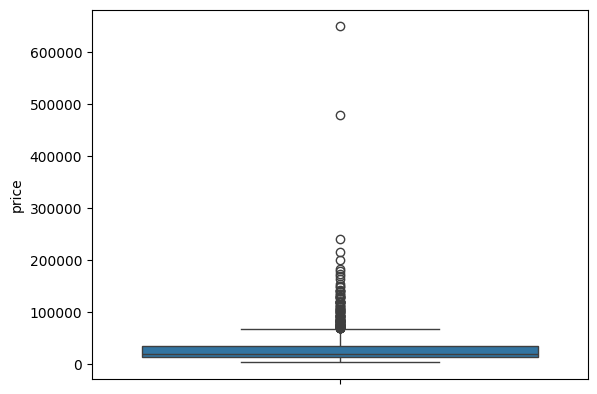

In [100]:
sns.boxplot(df['price'])

In [101]:
df[df['price'] > 250000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.5,2275.0,0,33.0,2.0,64.0,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,0,512.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.8,4000.0,1,27.0,8.0,256.0,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,1024.0


In [102]:
df['price'].isnull().sum()

np.int64(0)

In [103]:
df['rating'].describe()

count    966.000000
mean      78.177838
std        7.008126
min       60.000000
25%       75.000000
50%       79.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

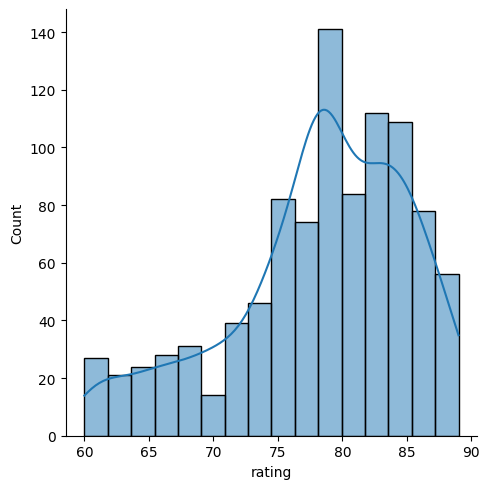

In [104]:
sns.displot(kind='hist',data=df,x='rating',kde=True)

In [105]:
df['rating'].skew()

np.float64(-0.7355686653891471)

<Axes: ylabel='rating'>

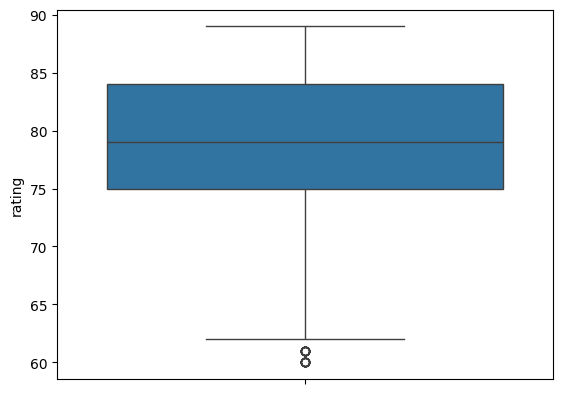

In [106]:
sns.boxplot(df['rating'])

In [107]:
df['rating'].isnull().sum()/980

np.float64(0.0)

In [108]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,1024.0


<Axes: ylabel='count'>

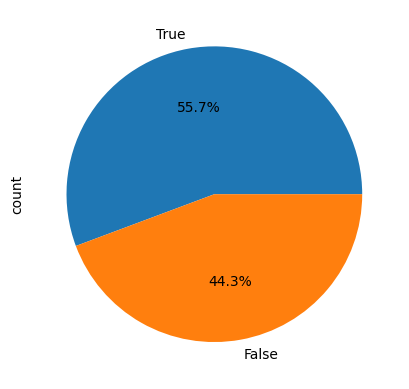

In [109]:
# has_5g
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

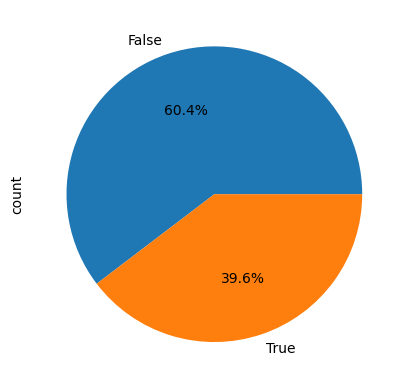

In [110]:
# has_nfc
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

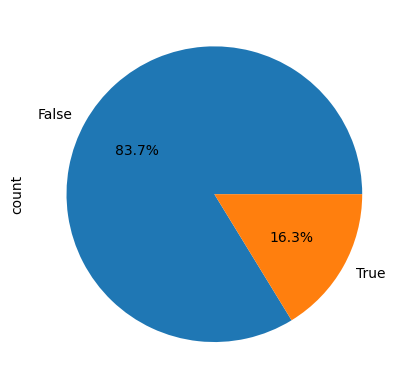

In [111]:
# has_ir_blaster
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [112]:
df[df['has_ir_blaster'] == True]['brand_name'].value_counts()

brand_name
xiaomi     109
poco        30
iqoo         6
vivo         4
huawei       4
redmi        2
honor        1
samsung      1
Name: count, dtype: int64

<Axes: ylabel='count'>

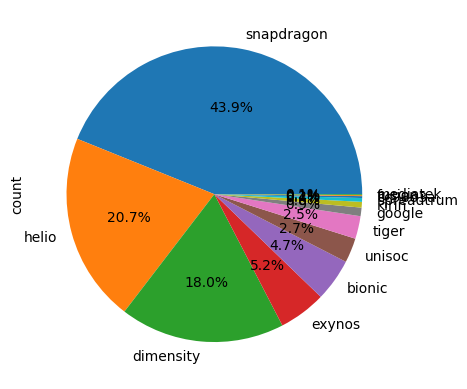

In [113]:
df['processor_brand'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

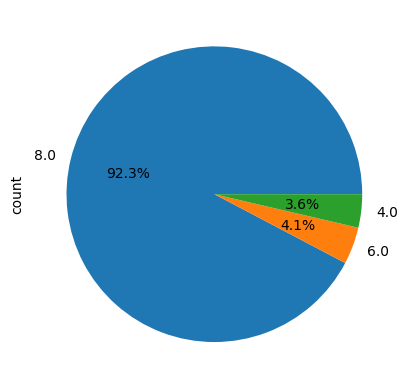

In [114]:
df['num_cores'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

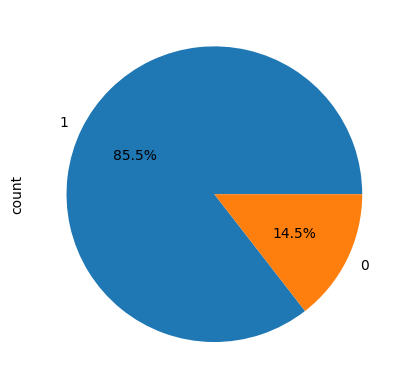

In [115]:

df['fast_charging_available'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

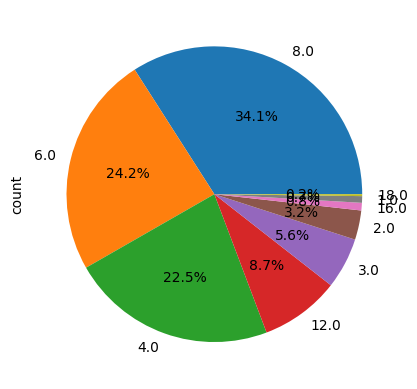

In [116]:

df['ram_capacity'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

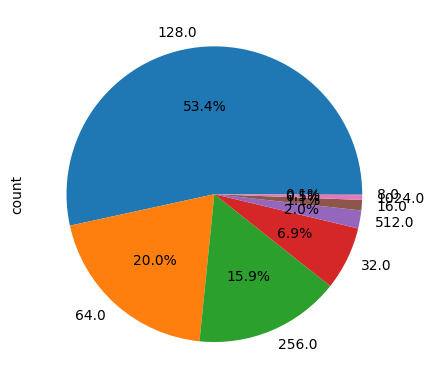

In [117]:
df['internal_memory'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

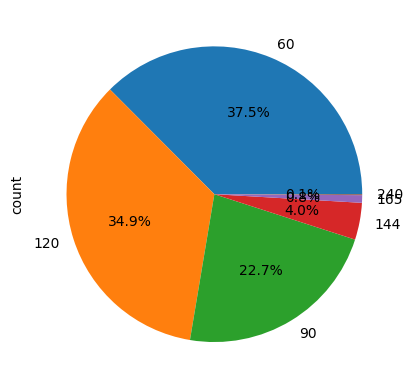

In [118]:
df['refresh_rate'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: xlabel='refresh_rate'>

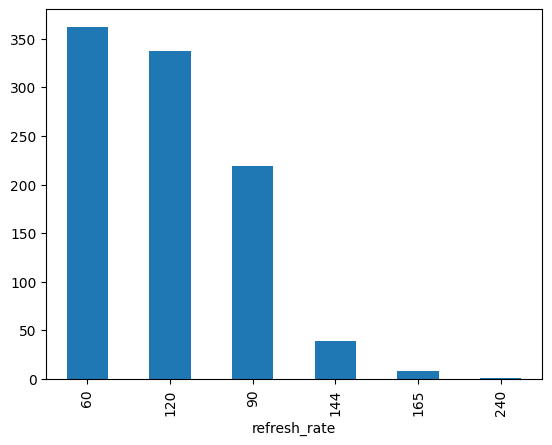

In [119]:
df['refresh_rate'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

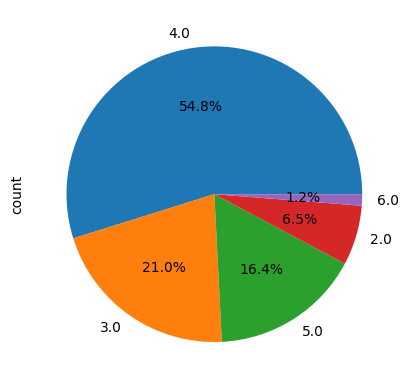

In [120]:
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

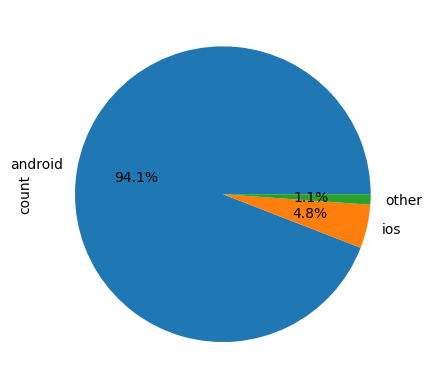

In [121]:
df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

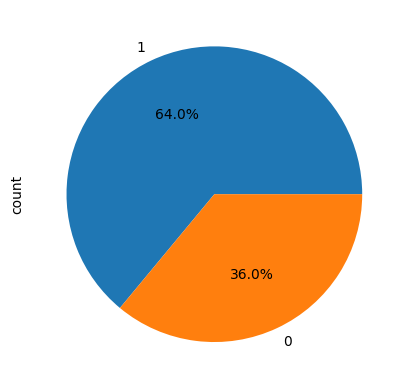

In [122]:
# extended_memory_available
df['extended_memory_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

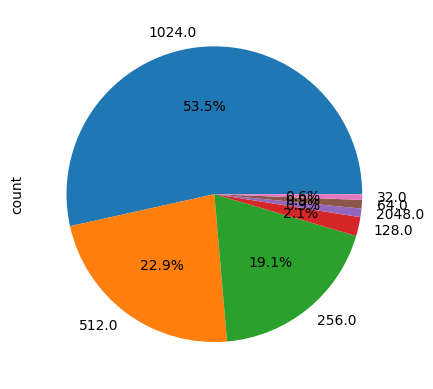

In [123]:
df['extended_upto'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [124]:
def plot_graphs(column_name):

  sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
  sns.catplot(kind='box',data=df,x=column_name)

In [125]:
num_columns = df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

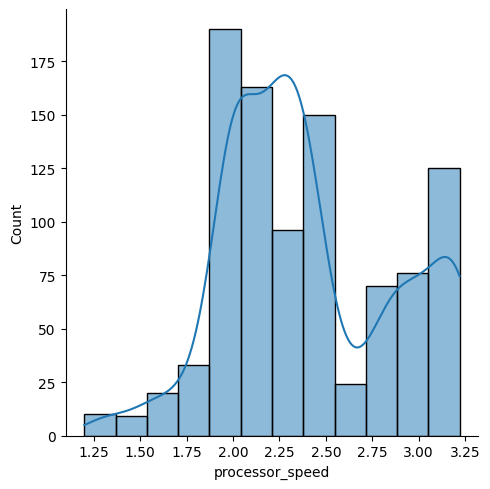

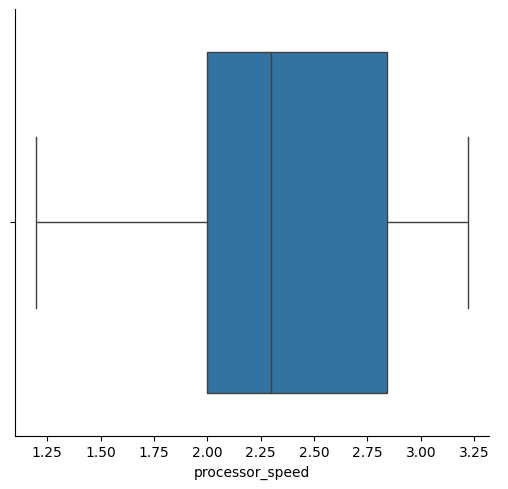

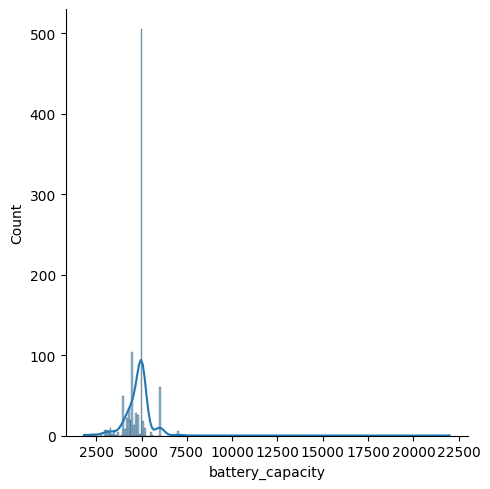

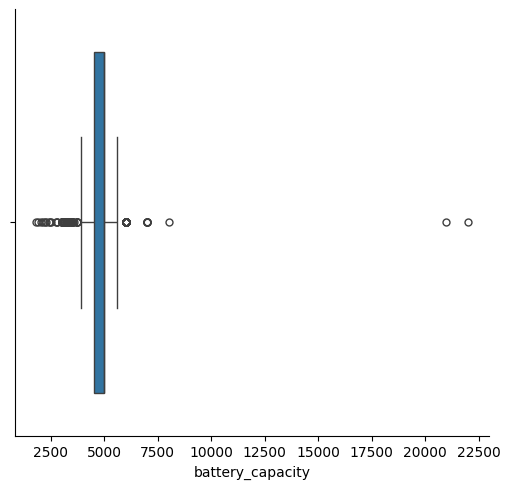

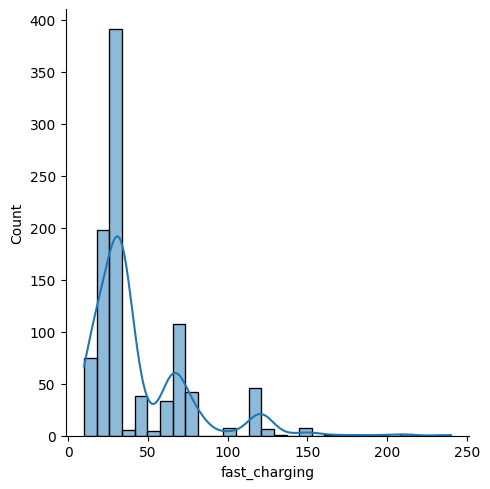

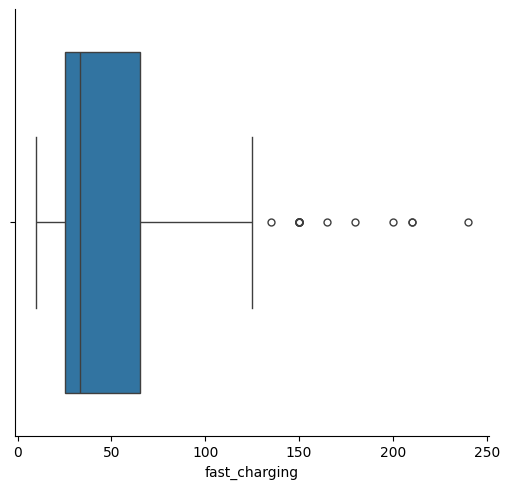

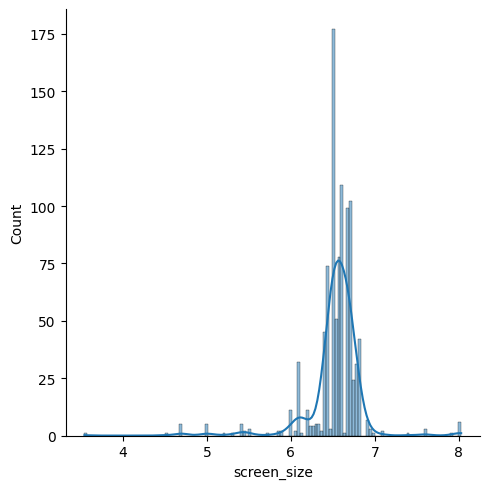

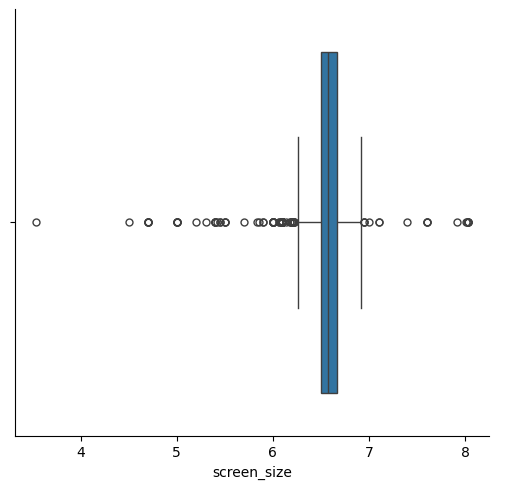

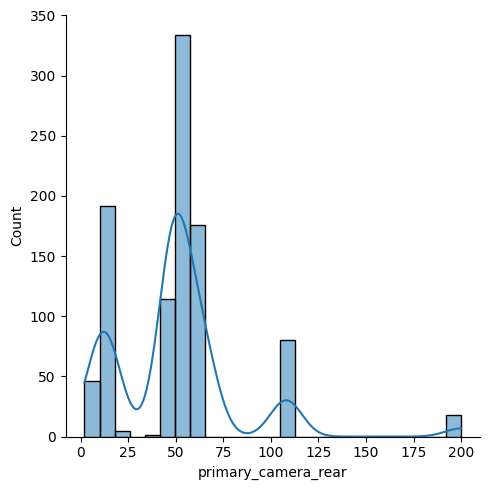

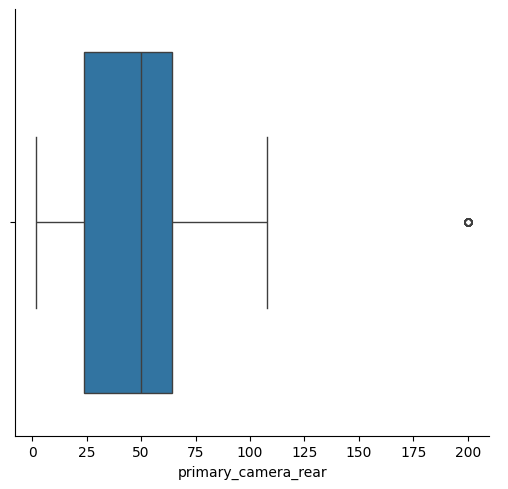

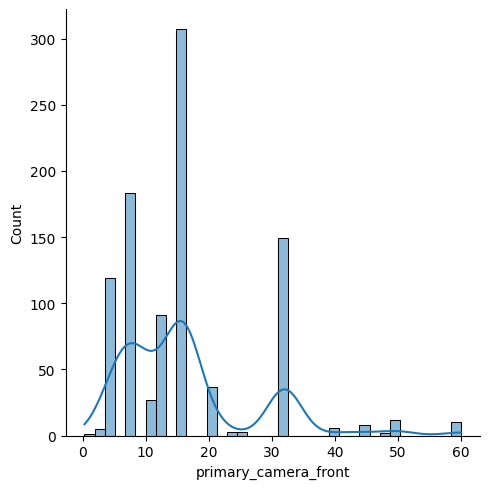

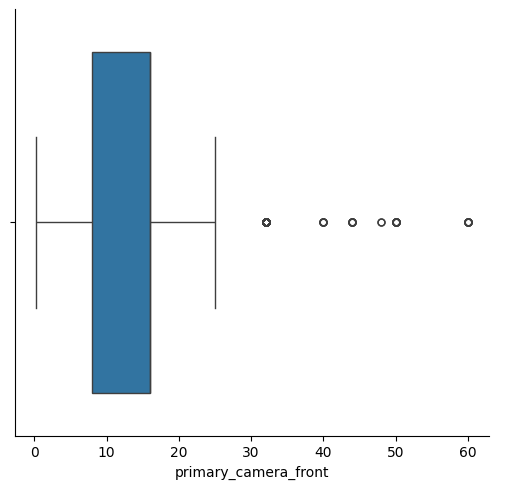

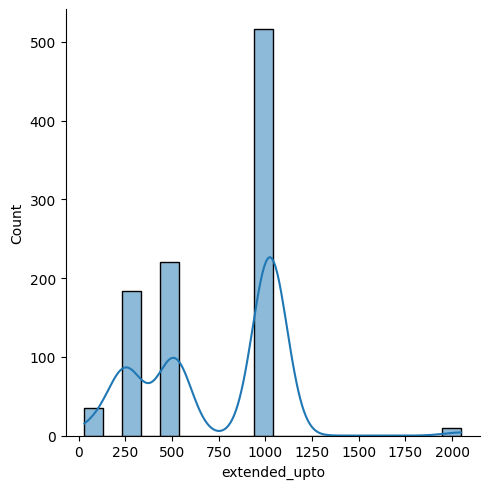

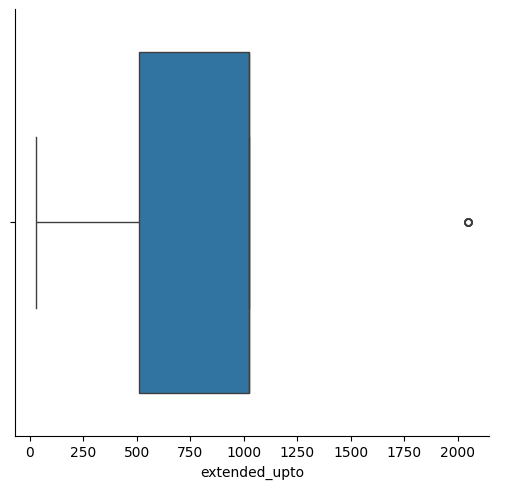

In [126]:
for col in num_columns:
  plot_graphs(col)

In [127]:
df.head(1000)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.000000,True,True,False,snapdragon,8.0,3.20,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.000000,True,False,False,snapdragon,8.0,2.20,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.000000,True,False,False,exynos,8.0,2.40,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.000000,True,False,False,snapdragon,8.0,2.20,5000.0,1,33.0,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.000000,True,False,False,dimensity,8.0,2.60,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,1024.0
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.000000,True,True,False,snapdragon,8.0,2.20,5000.0,1,25.0,6.0,128.0,6.60,120,1080 x 2408,3,1.0,android,50.0,8.0,1,1024.0
6,apple,Apple iPhone 14,65999,81.000000,True,True,False,bionic,6.0,3.22,3279.0,1,33.0,6.0,128.0,6.10,60,1170 x 2532,2,1.0,ios,12.0,12.0,0,1024.0
7,xiaomi,Xiaomi Redmi Note 12 Pro Plus,29999,86.000000,True,False,True,dimensity,8.0,2.60,4980.0,1,120.0,8.0,256.0,6.67,120,1080 x 2400,3,1.0,android,200.0,16.0,0,1024.0
8,nothing,Nothing Phone 1,26749,85.000000,True,True,False,snapdragon,8.0,2.50,4500.0,1,33.0,8.0,128.0,6.55,120,1080 x 2400,2,1.0,android,50.0,16.0,0,1024.0
9,oneplus,OnePlus Nord 2T 5G,28999,84.000000,True,True,False,dimensity,8.0,3.00,4500.0,1,80.0,8.0,128.0,6.43,90,1080 x 2400,3,1.0,android,50.0,32.0,0,1024.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'nothing'),
  Text(7, 0, 'oppo'),
  Text(8, 0, 'vivo'),
  Text(9, 0, 'poco'),
  Text(10, 0, 'iqoo'),
  Text(11, 0, 'jio'),
  Text(12, 0, 'gionee'),
  Text(13, 0, 'tecno'),
  Text(14, 0, 'tesla'),
  Text(15, 0, 'google'),
  Text(16, 0, 'infinix'),
  Text(17, 0, 'cola'),
  Text(18, 0, 'letv'),
  Text(19, 0, 'ikall'),
  Text(20, 0, 'leeco'),
  Text(21, 0, 'duoqin'),
  Text(22, 0, 'nokia'),
  Text(23, 0, 'lava'),
  Text(24, 0, 'honor'),
  Text(25, 0, 'nubia'),
  Text(26, 0, 'redmi'),
  Text(27, 0, 'asus'),
  Text(28, 0, 'itel'),
  Text(29, 0, 'sony'),
  Text(30, 0, 'oukitel'),
  Tex

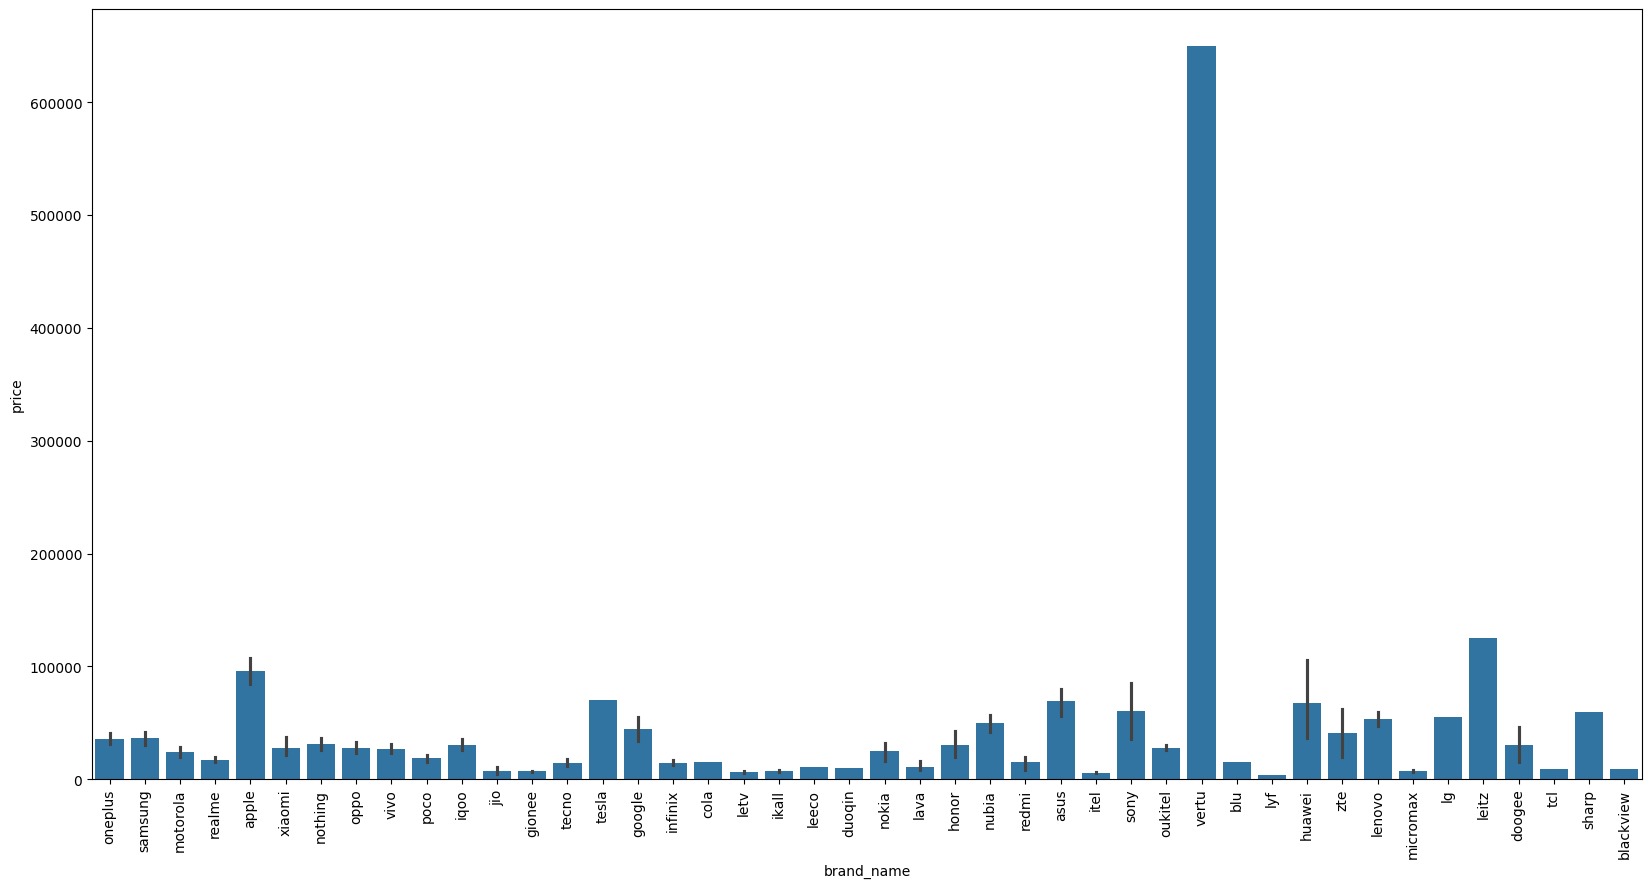

In [128]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

In [129]:
x = df.groupby('brand_name').count()['model']

In [130]:
temp_df = df[df['brand_name'].isin(x[x > 10].index)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'oneplus'),
  Text(1, 0, 'samsung'),
  Text(2, 0, 'motorola'),
  Text(3, 0, 'realme'),
  Text(4, 0, 'apple'),
  Text(5, 0, 'xiaomi'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'vivo'),
  Text(8, 0, 'poco'),
  Text(9, 0, 'iqoo'),
  Text(10, 0, 'tecno'),
  Text(11, 0, 'google'),
  Text(12, 0, 'infinix'),
  Text(13, 0, 'nokia'),
  Text(14, 0, 'honor'),
  Text(15, 0, 'huawei')])

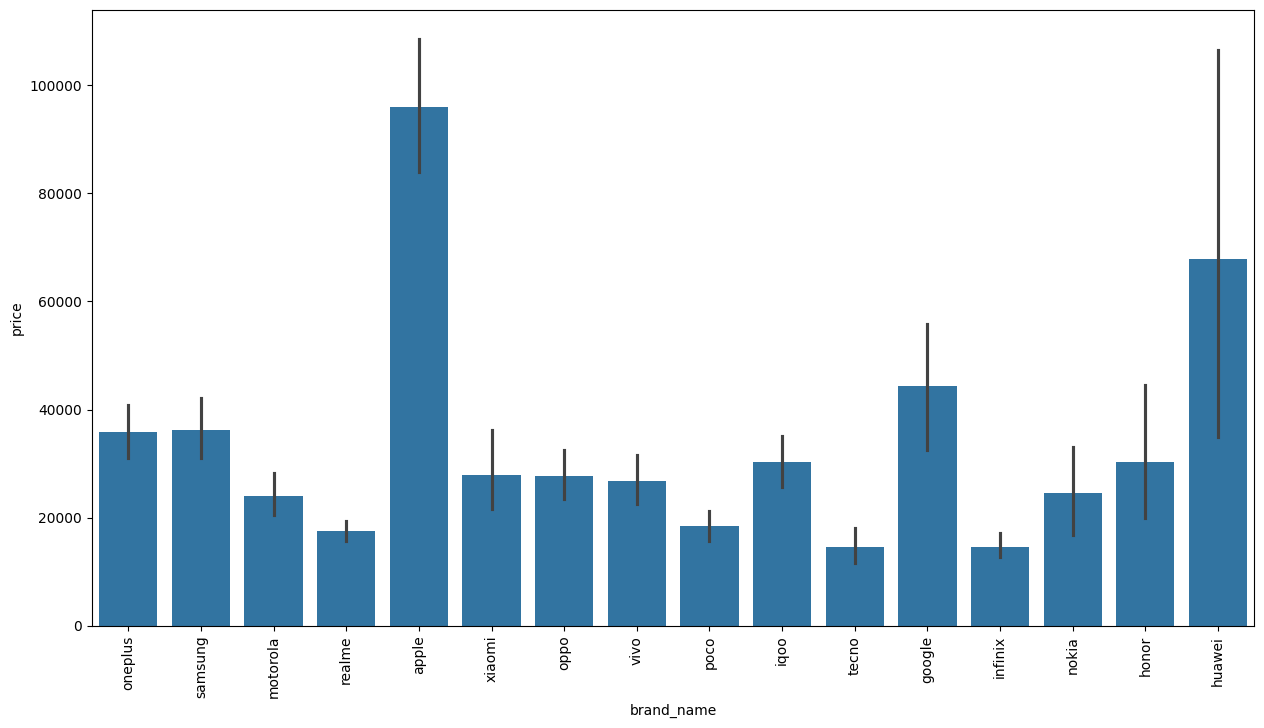

In [131]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df,x='brand_name',y='price')
plt.xticks(rotation='vertical')

In [132]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,1024.0


<Axes: xlabel='rating', ylabel='price'>

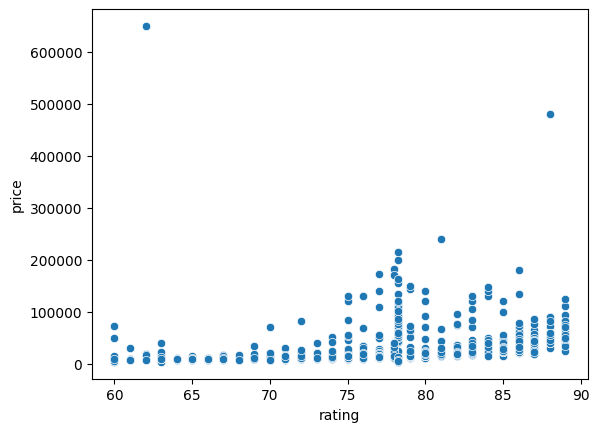

In [133]:
sns.scatterplot(data=df,x='rating',y='price')

<Axes: xlabel='has_5g', ylabel='price'>

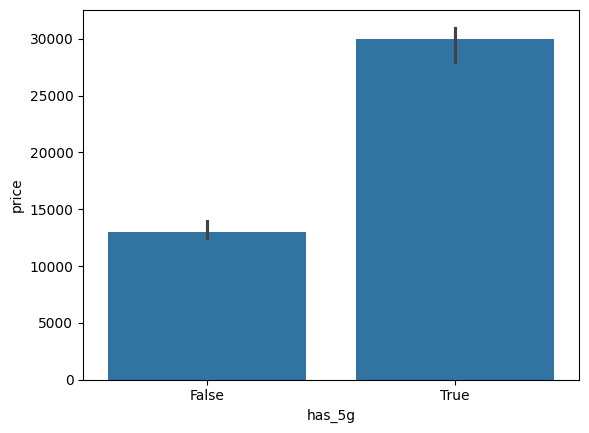

In [134]:
sns.barplot(data=temp_df,x='has_5g',y='price',estimator=np.median)

<Axes: xlabel='has_nfc', ylabel='price'>

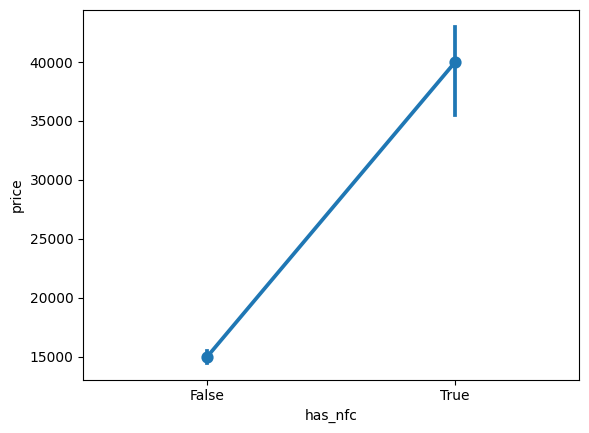

In [135]:
sns.pointplot(data=temp_df,x='has_nfc',y='price',estimator=np.median)

<Axes: xlabel='has_ir_blaster', ylabel='price'>

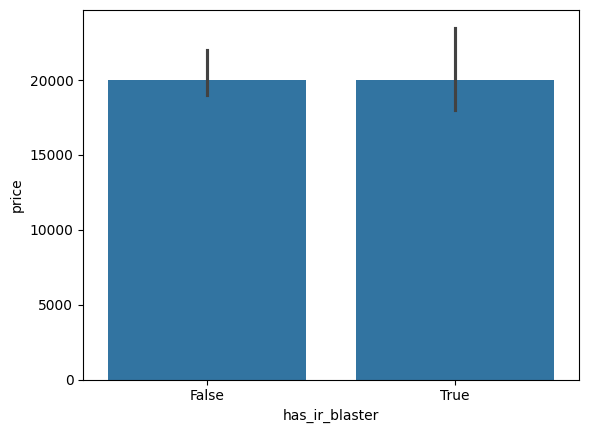

In [136]:
sns.barplot(data=temp_df,x='has_ir_blaster',y='price',estimator=np.median)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'exynos'),
  Text(2, 0, 'dimensity'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'unisoc'),
  Text(6, 0, 'google'),
  Text(7, 0, 'tiger'),
  Text(8, 0, 'sc9863a'),
  Text(9, 0, 'fusion'),
  Text(10, 0, 'kirin'),
  Text(11, 0, 'spreadtrum'),
  Text(12, 0, 'mediatek')])

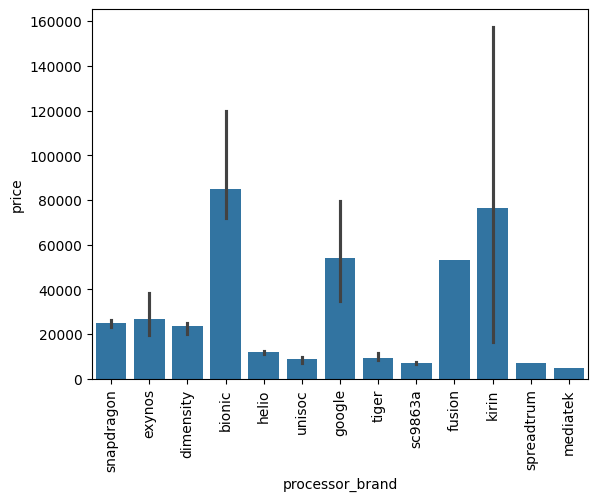

In [137]:
sns.barplot(data=temp_df,x='processor_brand',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

([0, 1, 2], [Text(0, 0, '4.0'), Text(1, 0, '6.0'), Text(2, 0, '8.0')])

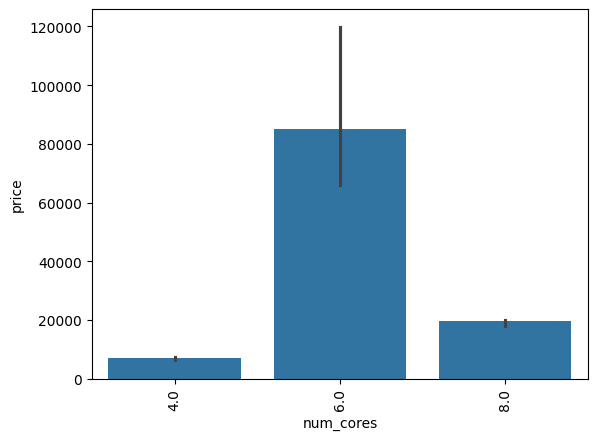

In [138]:
sns.barplot(data=temp_df,x='num_cores',y='price',estimator=np.median)
plt.xticks(rotation='vertical')

In [139]:
pd.crosstab(df['num_cores'],df['os'])

os,android,ios,other
num_cores,,,
4.0,33,1,1
6.0,0,39,0
8.0,875,1,10


<Axes: xlabel='processor_speed', ylabel='price'>

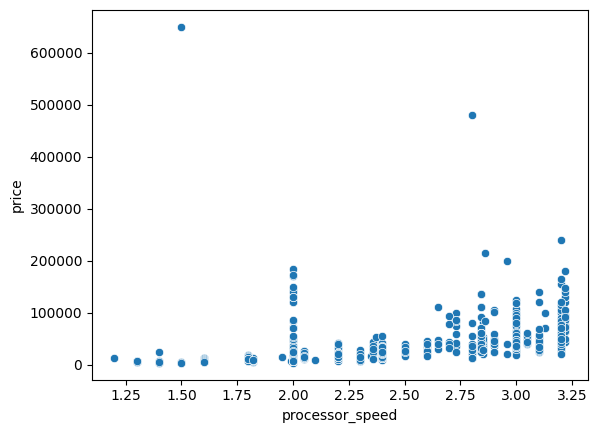

In [140]:
sns.scatterplot(data=df,x='processor_speed',y='price')

<Axes: xlabel='screen_size', ylabel='price'>

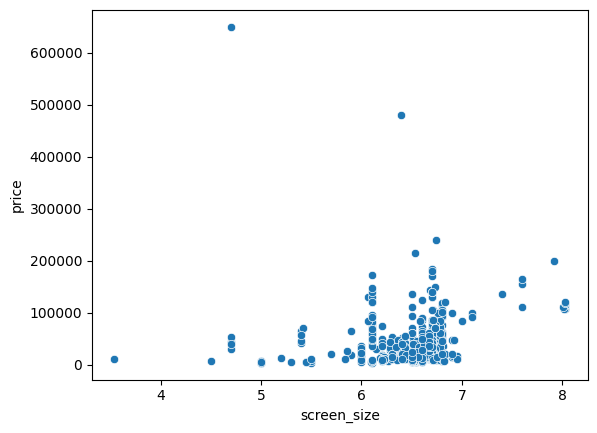

In [141]:
sns.scatterplot(data=df,x='screen_size',y='price')

In [142]:
df.isnull().sum()

brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    6
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
resolution                   0
num_rear_cameras             0
num_front_cameras            3
os                           0
primary_camera_rear          0
primary_camera_front         3
extended_memory_available    0
extended_upto                1
dtype: int64

In [144]:
# knn imputer
df.shape

(966, 25)

In [145]:
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [146]:
from sklearn.impute import KNNImputer

In [147]:
imputer = KNNImputer(n_neighbors=5)

In [148]:
x_df_values = imputer.fit_transform(x_df)

In [149]:
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)

In [150]:
x_df['price'] = df['price']

In [151]:
x_df.head()

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,price
0,89.0,8.0,3.2,5000.0,1.0,100.0,12.0,256.0,6.70,120.0,3.0,1.0,50.0,16.0,0.0,921.6,54999.0
1,81.0,8.0,2.2,5000.0,1.0,33.0,6.0,128.0,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,19989.0
2,75.0,8.0,2.4,5000.0,1.0,15.0,4.0,64.0,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0,16499.0
3,81.0,8.0,2.2,5000.0,1.0,33.0,6.0,128.0,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0,14999.0
4,82.0,8.0,2.6,5000.0,1.0,67.0,6.0,128.0,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0,24999.0


In [152]:
a = x_df.corr()['price'].reset_index()